# Comparing Biomedical Language Models for Disease Representation

This notebook aims to evaluate and compare various pre-trained language models, including general-purpose and domain-specific ones, in their ability to represent and distinguish between different diseases and medical conditions. We'll explore how well these models capture the semantic relationships between diseases. This will help to assess which representations we might want to include in downstream tasks.

## Theory

Try to explain the theory and use infographics.



## Objective
Our goal is to assess how well different models capture the semantic relationships between various diseases across multiple medical domains. We're particularly interested in:

- How well the models cluster similar diseases together
- How effectively they distinguish between different disease categories
- The granularity of their representations for closely related conditions

## Methodology

We're using a set of carefully selected diseases spanning various medical categories:

| Category                        | Diseases                                                                                  |
|---------------------------------|-------------------------------------------------------------------------------------------|
| Cardiovascular Diseases         | Coronary Artery Disease, Congestive heart failure                           |
| Neurological Disorders          | Alzheimer's, Parkinson's                                  |
| Autoimmune Diseases             | Systemic Lupus Erythematosus, Rheumatoid Arthritis                         |
| Gastrointestinal Disorders      | Irritable bowel syndrome (IBS), Gastroesophageal reflux disease (GERD)     |
| Musculoskeletal Disorders       | Osteoarthritis, Osteoporosis                                                              |
| Psychiatric Disorders           | Depression,Schizophrenia                                               |
| Solid State Tumors/Cancers      | Breast cancer, Lung cancer                                               |
| Hematological Cancers           | Leukemia, Lymphoma                                               |



For each model, we:

- Generate embeddings for each disease
- Compute cosine similarities between these embeddings
- Visualize the results using heatmaps and PCA plots

**Models Evaluated:**

We're comparing several models, including:

| Name | Description |
|---------|--------------------|
| BERT         | Used as a non-domain specific benchmark. |
| BioBERT      | Developped at the DMIS lab at the Korea University, another BERT-based model pre-trained on biomedical corpora, including PubMed abstracts and PubMed Central full-text articles. |
| BioMedBERT   | Developped by Microsoft, a BERT model pre-trained specifically on a large corpus of biomedical literature, including PubMed abstracts and full-text articles. |
| MedBERT      | A contextualized embedding model pretrained on a structured EHR dataset of 28,490,650 patients. |
| TinyBioBERT  | Smaller, distilled version of BioBERT, designed to retain most of the performance benefits of BioBERT while being more computationally efficient. |
| ClinicalBERT | A BERT model fine-tuned on clinical notes from electronic health records. It is especially adept at understanding clinical language and the specific terminology used in patient records. |
| BlueBERT     | A BERT model pre-trained on PubMed abstracts and MIMIC-III clinical notes. This dual-domain pre-training aims to capture both biomedical literature and clinical notes. |

In [72]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Clinical Trials Outcomes')

import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Mounted at /content/drive


Processing BERT...


<ipython-input-114-9b8f84885f99>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


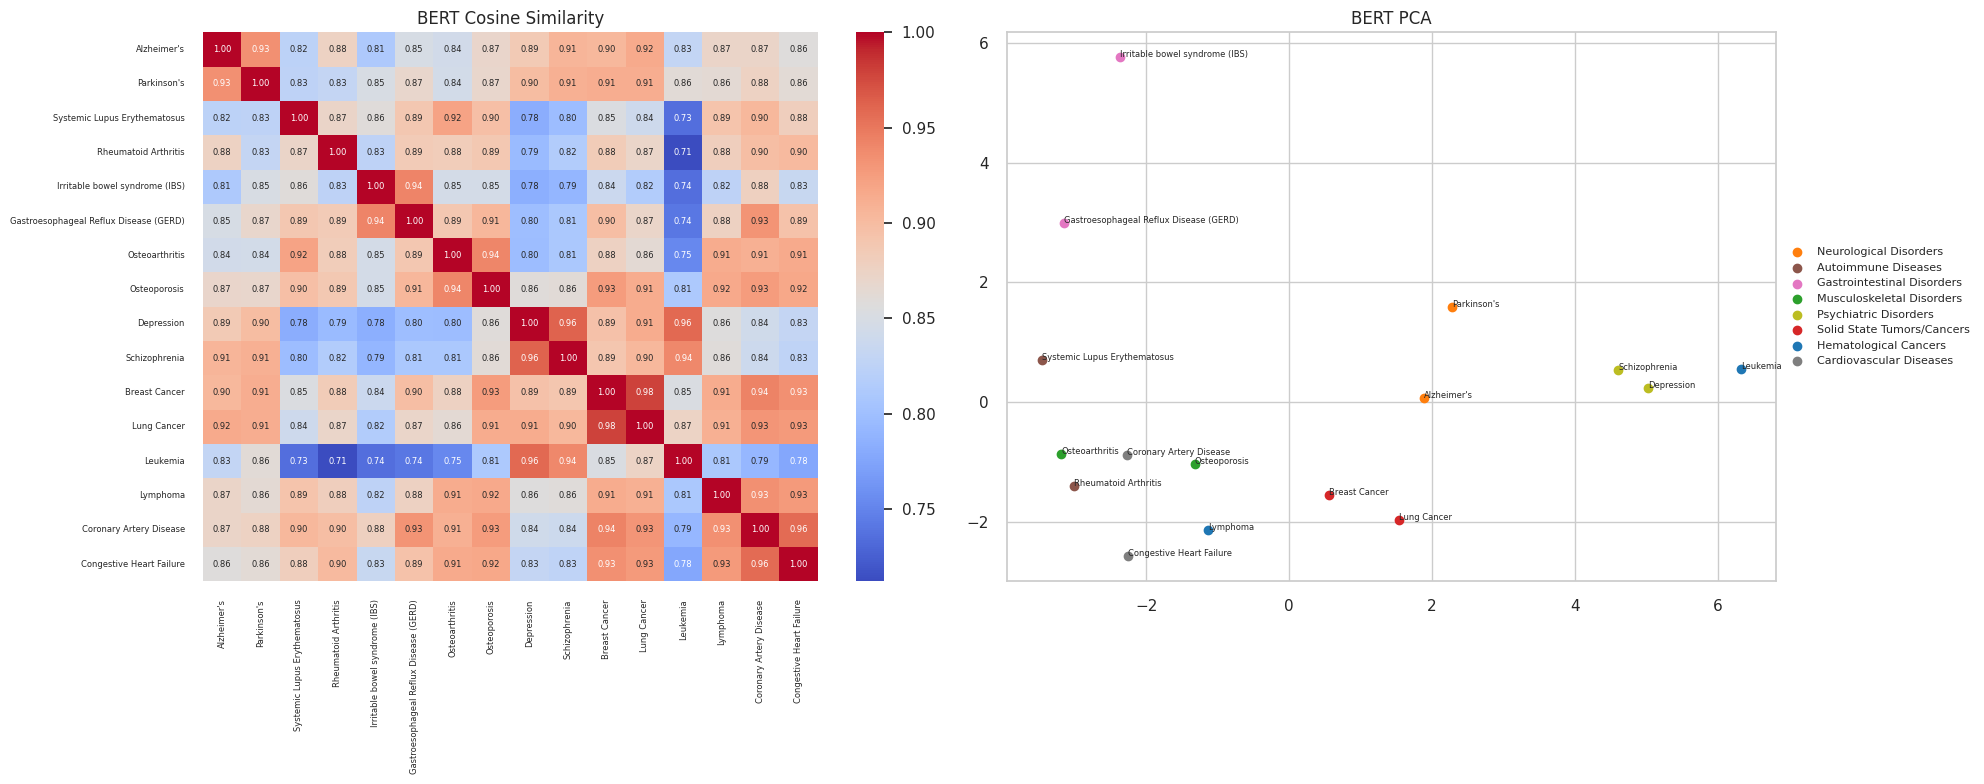

Processing MedBERT...


<ipython-input-114-9b8f84885f99>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


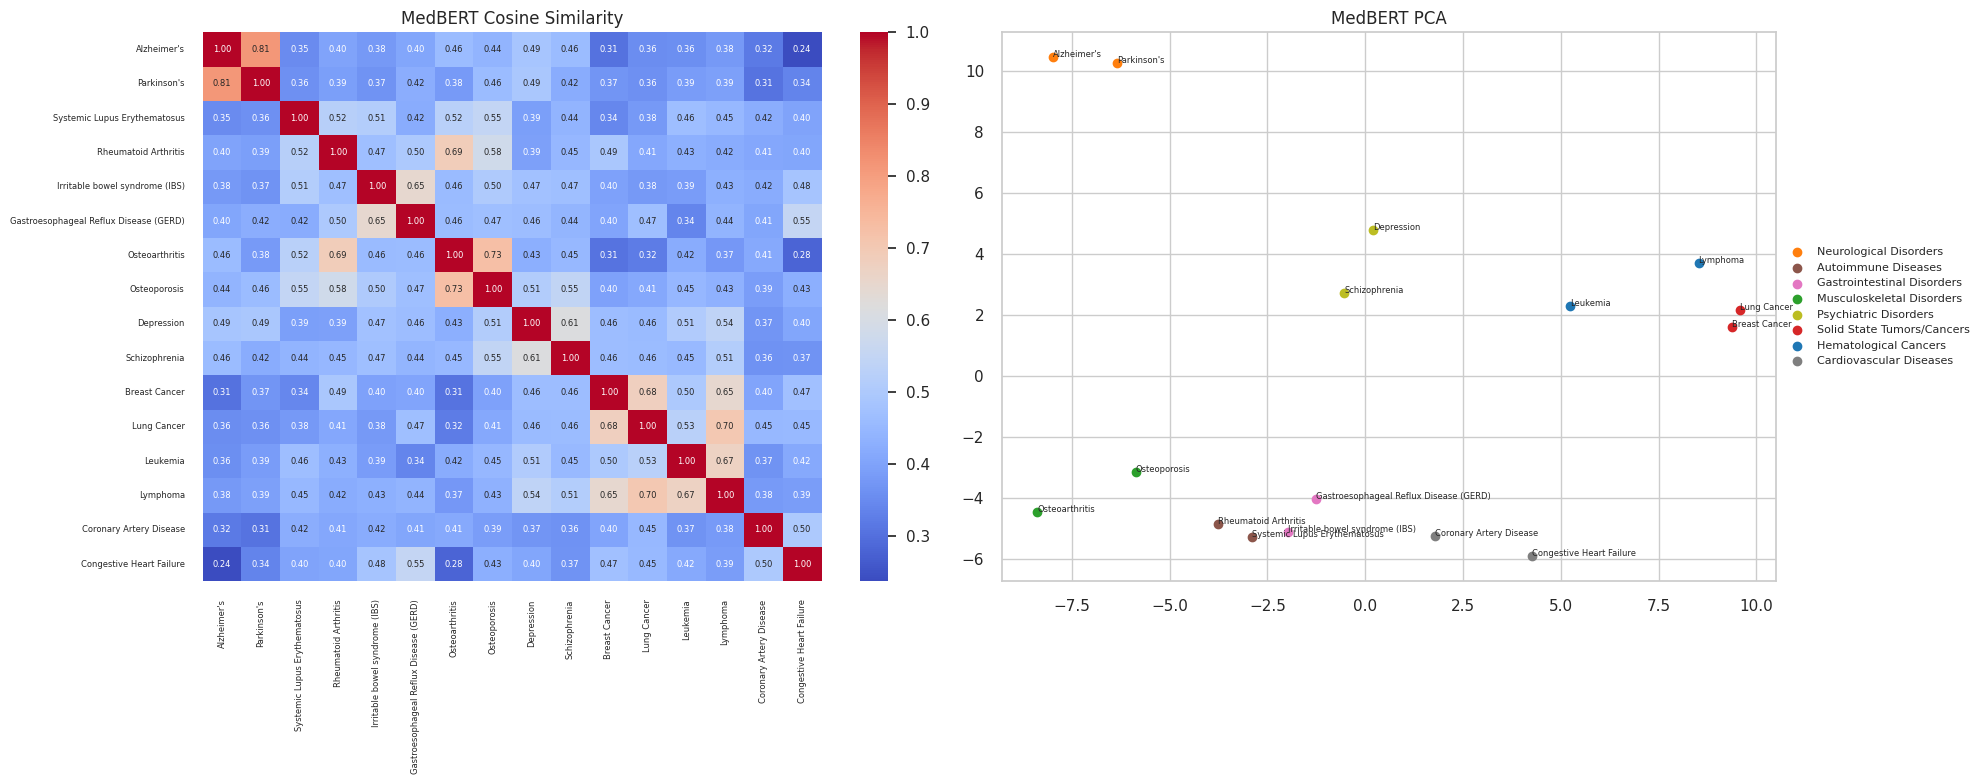

Processing BiomedBERT...


<ipython-input-114-9b8f84885f99>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


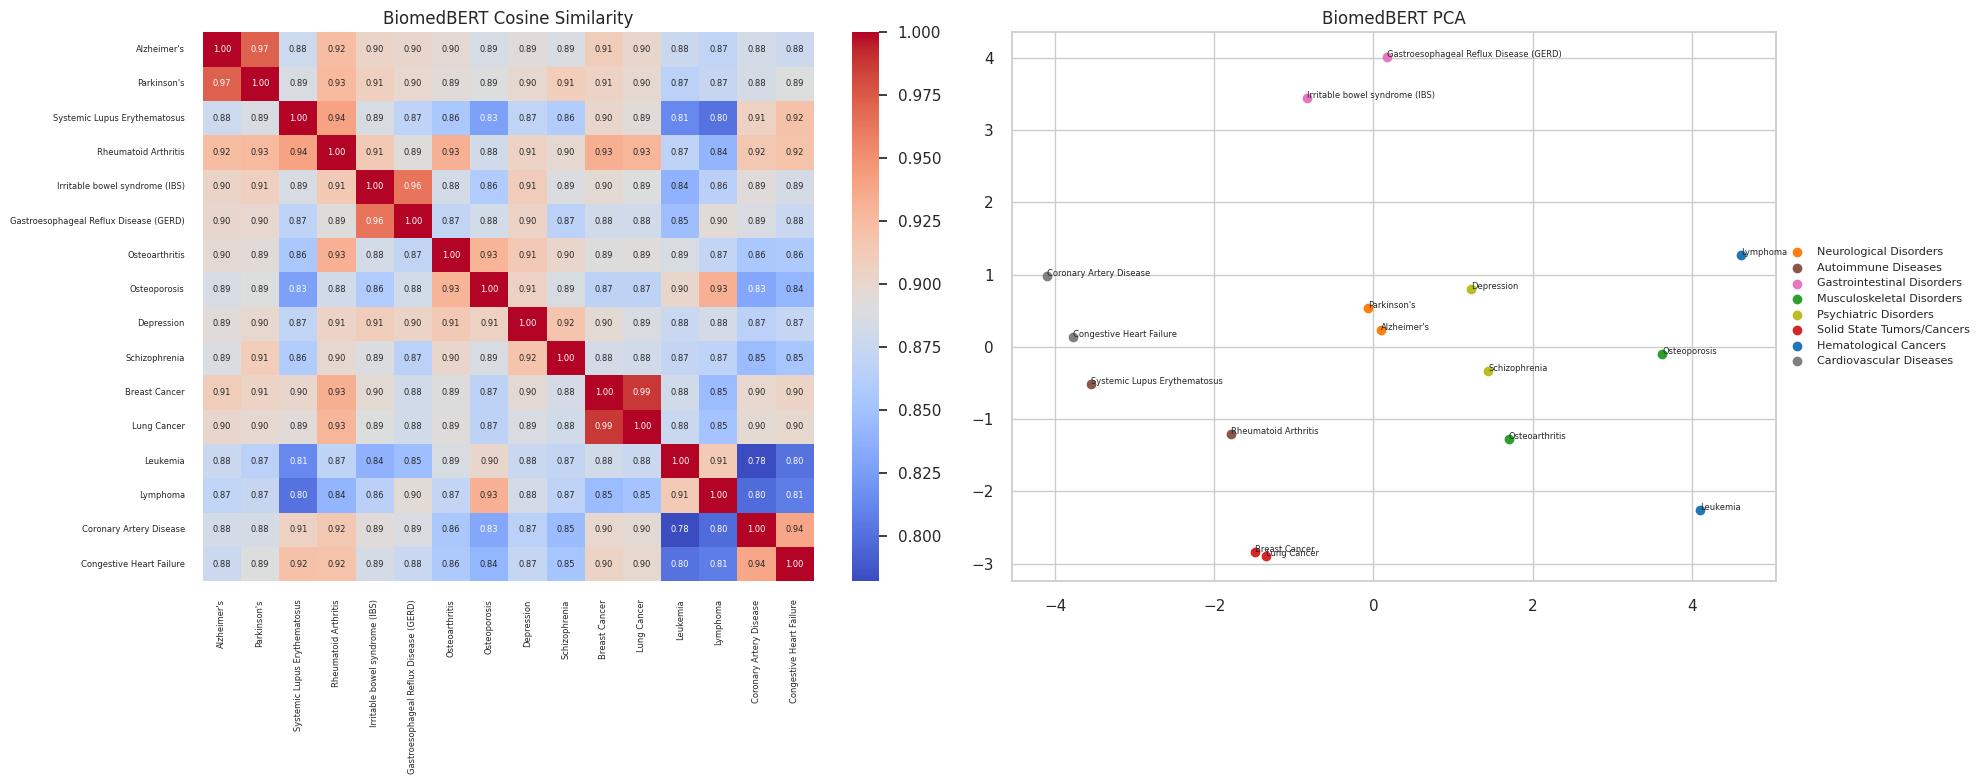

Processing BioBERT...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
<ipython-input-114-9b8f84885f99>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


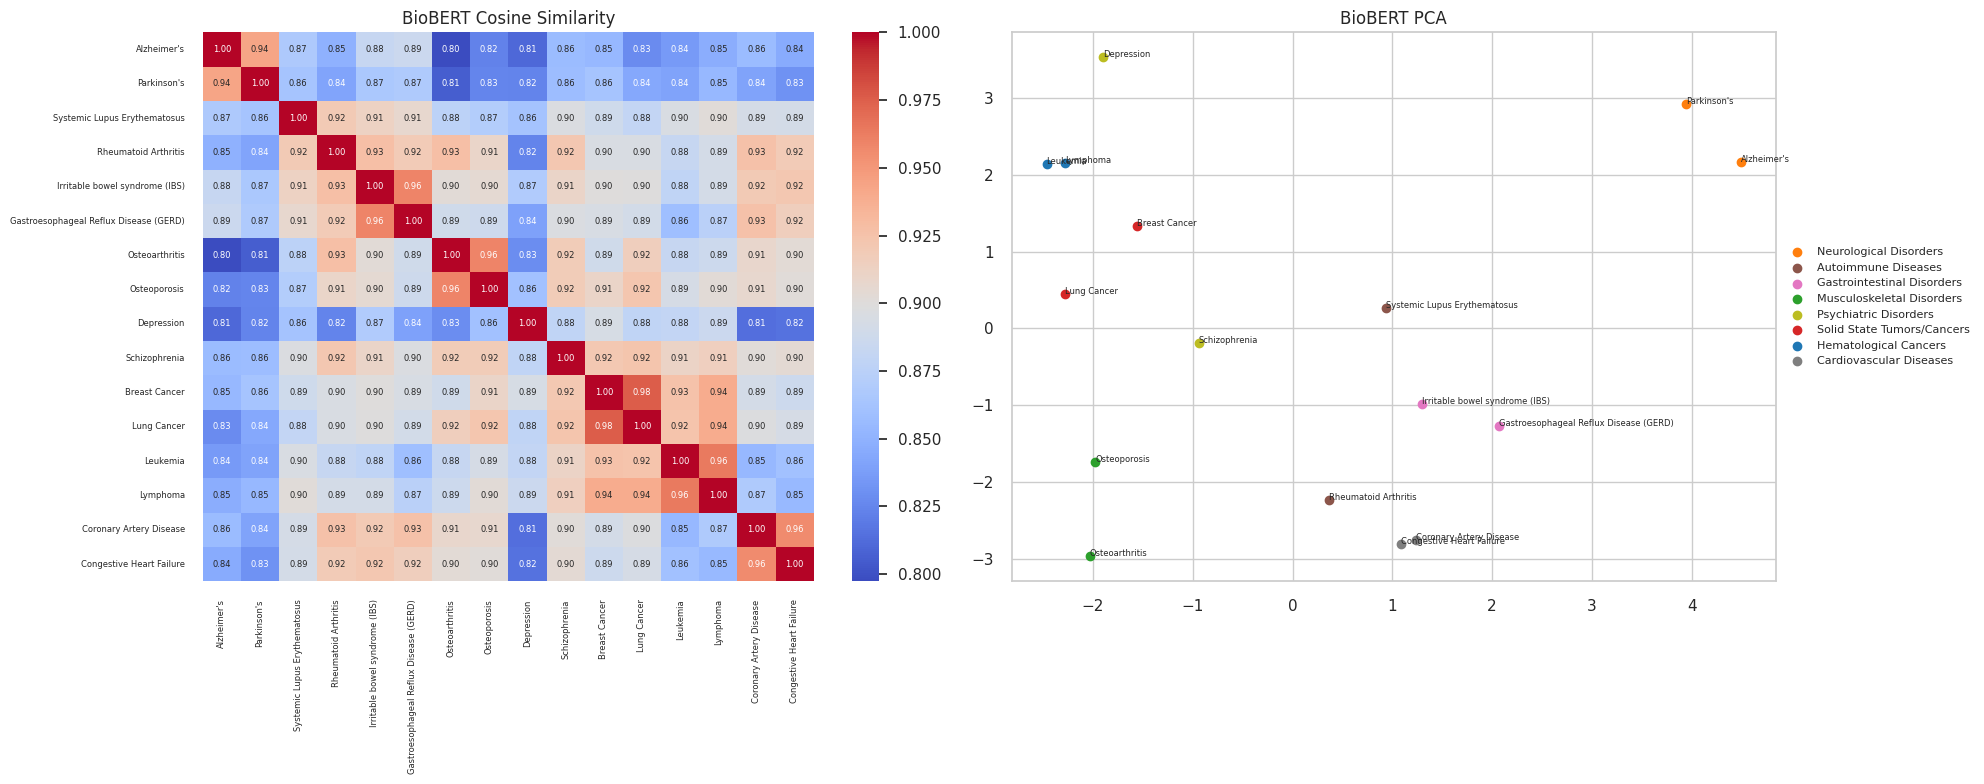

Processing TinyBioBERT...


Some weights of BertModel were not initialized from the model checkpoint at nlpie/tiny-biobert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-114-9b8f84885f99>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


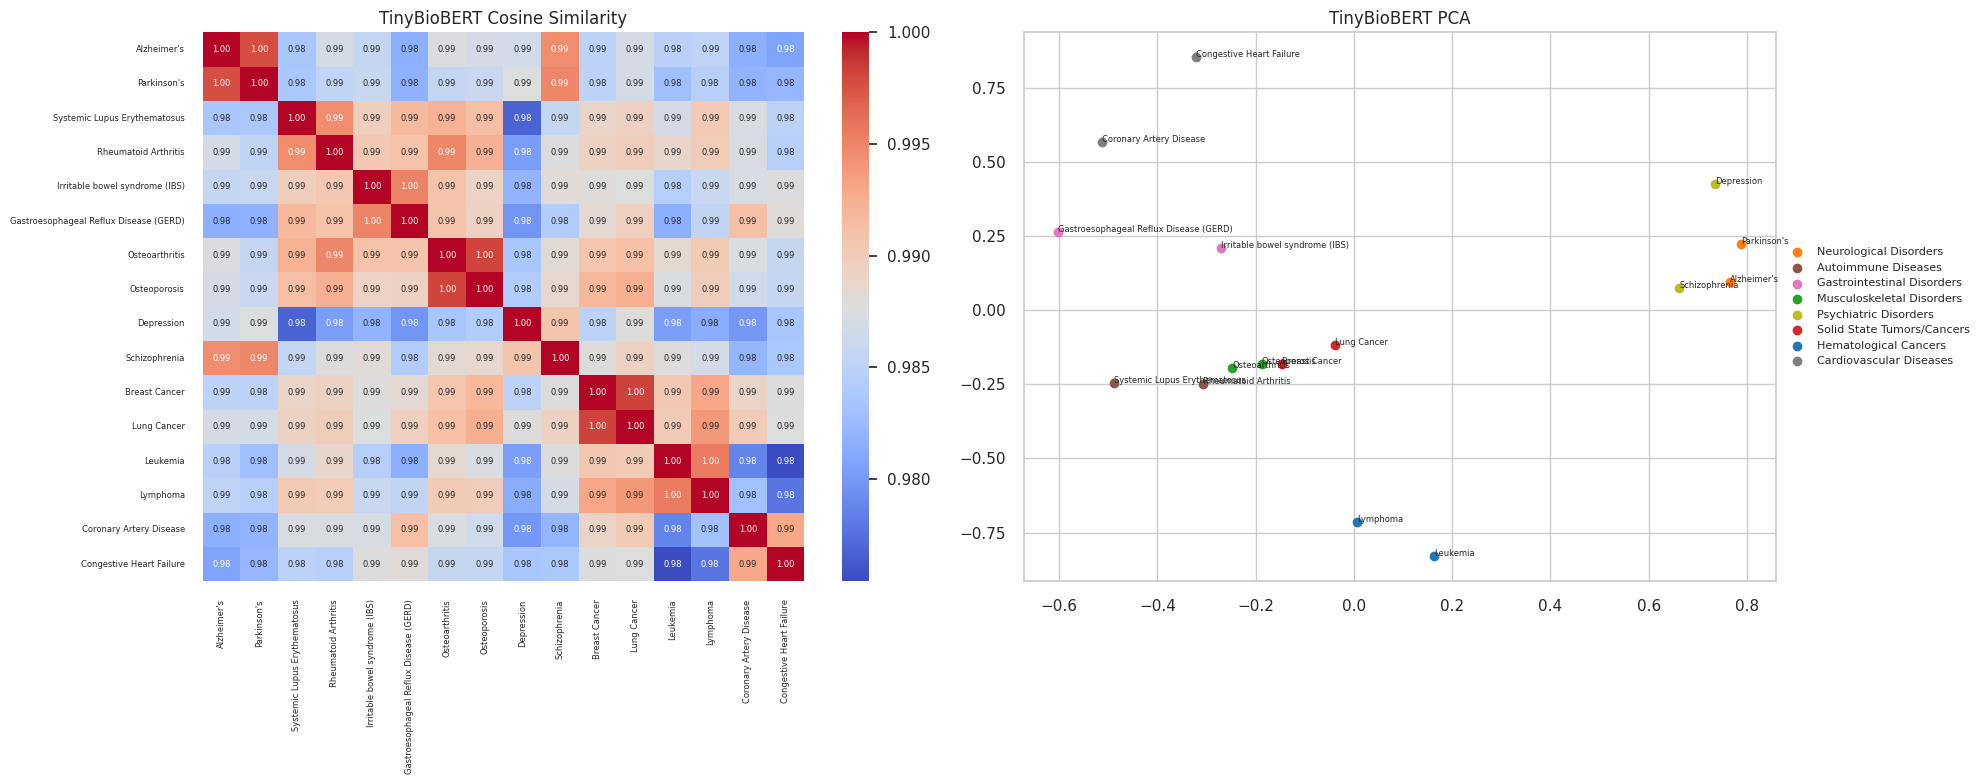

Processing ClinicalBERT...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
<ipython-input-114-9b8f84885f99>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


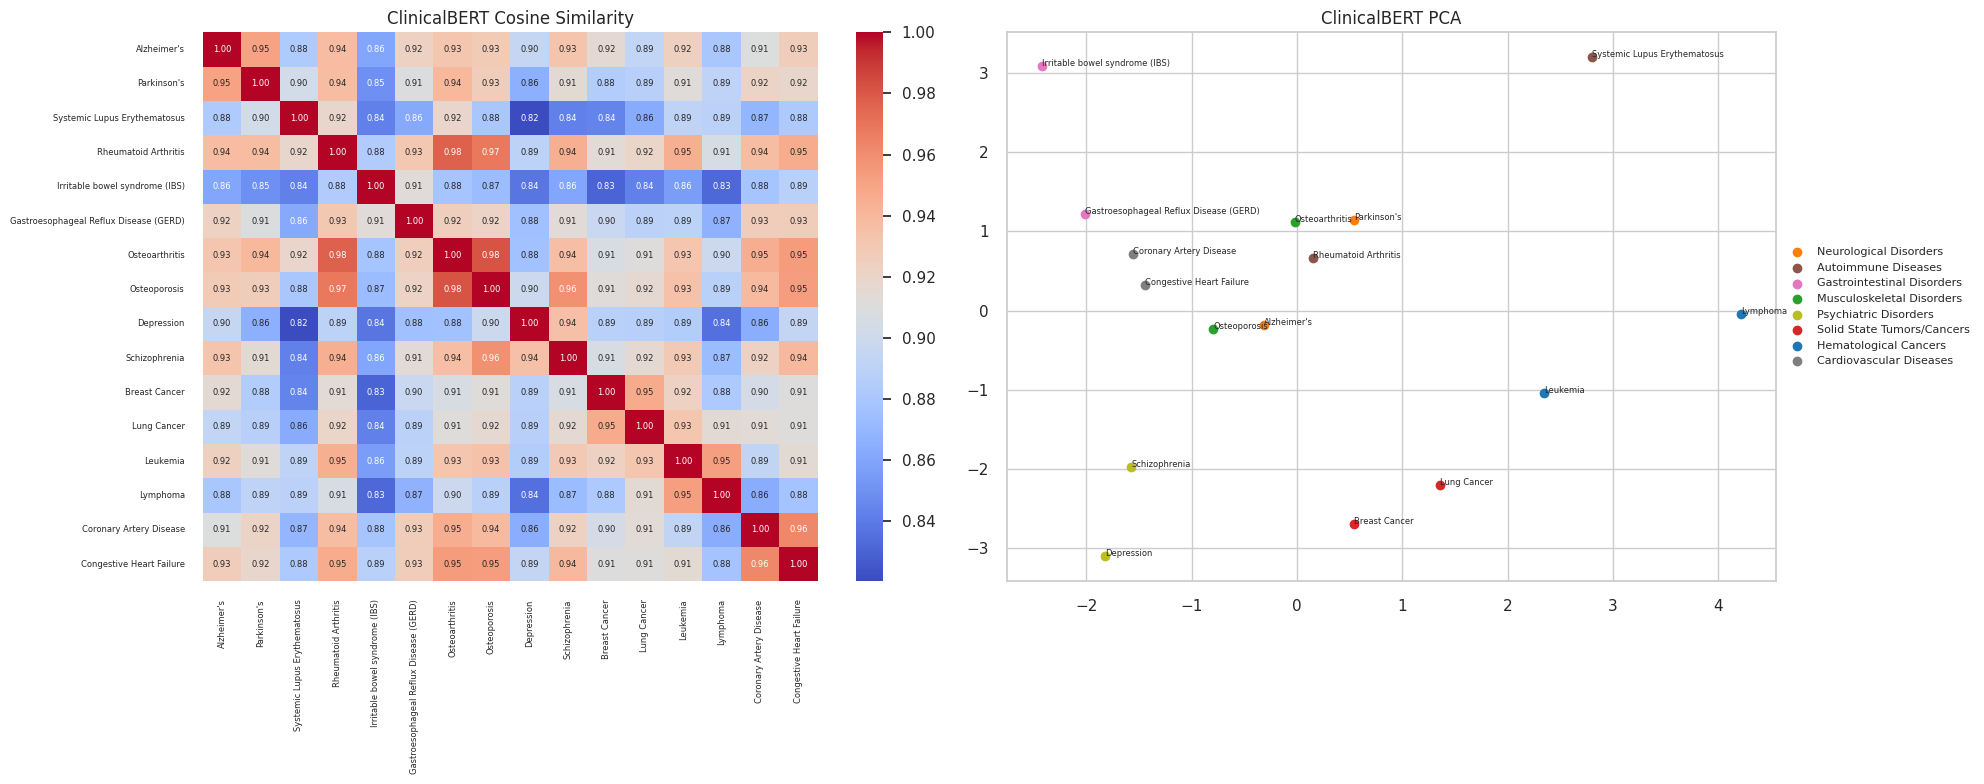

Processing BlueBERT...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
<ipython-input-114-9b8f84885f99>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


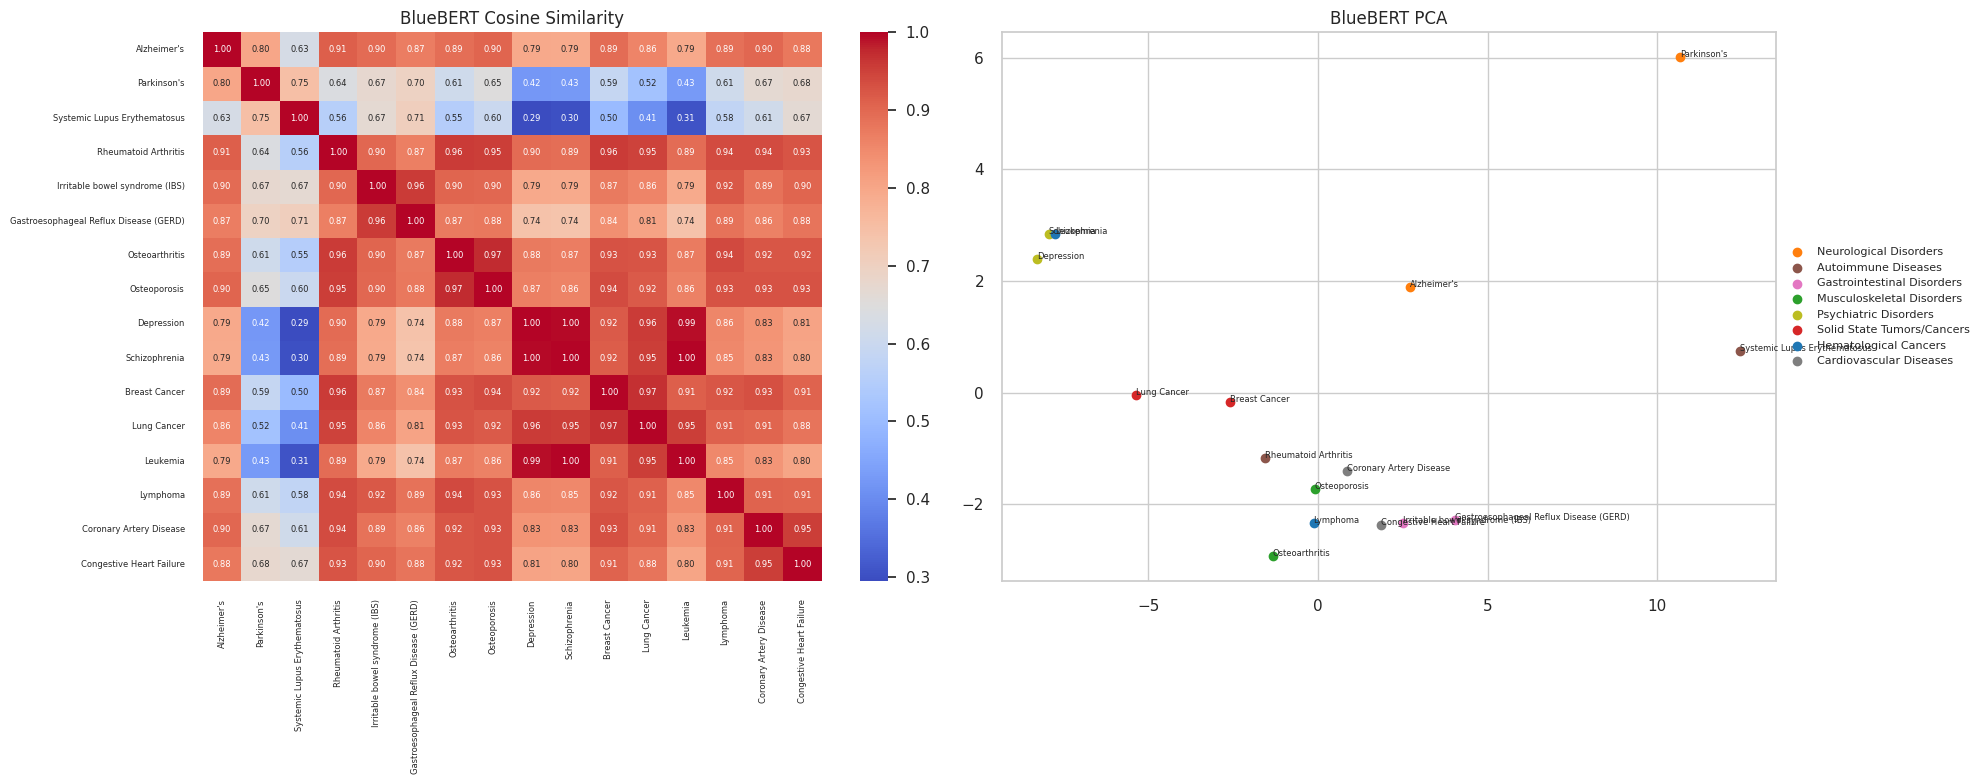

In [114]:
%matplotlib inline

# Set up Seaborn theme
sns.set_theme(style="whitegrid")

# Define categories and diseases (same as before)
categories = {
    'Neurological Disorders': ["Alzheimer's", "Parkinson's"],
    'Autoimmune Diseases': ['Systemic Lupus Erythematosus', 'Rheumatoid Arthritis'],
    'Gastrointestinal Disorders': ['Irritable bowel syndrome (IBS)', 'Gastroesophageal Reflux Disease (GERD)'],
    'Musculoskeletal Disorders': ['Osteoarthritis', 'Osteoporosis'],
    'Psychiatric Disorders': ['Depression', 'Schizophrenia'],
    'Solid State Tumors/Cancers': ['Breast Cancer', 'Lung Cancer'],
    'Hematological Cancers': ['Leukemia', 'Lymphoma'],
    'Cardiovascular Diseases': ['Coronary Artery Disease', 'Congestive Heart Failure'],
    # 'Non-Domain Terms': ['Space Rocket', 'Lady Gaga']
}

diseases = [disease for category in categories.values() for disease in category]
disease_to_category = {disease: category for category, diseases in categories.items() for disease in diseases}

# Define models (same as before)
models = {
    'BERT': 'google-bert/bert-base-uncased',
    'MedBERT': 'Charangan/MedBERT',
    'BiomedBERT': 'microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext',
    'BioBERT': 'dmis-lab/biobert-base-cased-v1.2',
    'TinyBioBERT': 'nlpie/tiny-biobert',
    'ClinicalBERT': 'emilyalsentzer/Bio_ClinicalBERT',
    'BlueBERT': 'bionlp/bluebert_pubmed_uncased_L-24_H-1024_A-16'
}

# Function to get embeddings (same as before)
def get_embeddings(model, tokenizer, sentences):
    embeddings = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=64)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :].numpy().squeeze())
    return np.array(embeddings)

# Function to plot heatmap and PCA side by side
def plot_model_results(similarity_matrix, embeddings, model_name, save=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Heatmap
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=diseases, yticklabels=diseases, ax=ax1, fmt='.2f', annot_kws={'size': 6})
    ax1.set_title(f"{model_name} Cosine Similarity", fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=6)
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=6)

    # PCA
    pca = PCA(n_components=2)
    embedding_2d = pca.fit_transform(embeddings)

    unique_categories = list(set(categories.keys()))
    color_map = plt.cm.get_cmap('tab10')
    colors = {cat: color_map(i/len(unique_categories)) for i, cat in enumerate(unique_categories)}

    for i, disease in enumerate(diseases):
        category = disease_to_category[disease]
        ax2.scatter(embedding_2d[i, 0], embedding_2d[i, 1], color=colors[category], label=category)
        ax2.annotate(disease, (embedding_2d[i, 0], embedding_2d[i, 1]), fontsize=6)

    ax2.set_title(f"{model_name} PCA", fontsize=12)
    handles, labels = ax2.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax2.legend(by_label.values(), by_label.keys(), fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    if save:
        plt.savefig(f"{model_name}_results.png", dpi=300, bbox_inches='tight')
    else:
        plt.show()
    plt.close()

# Process each model
for model_name, model_path in models.items():
    print(f"Processing {model_name}...")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModel.from_pretrained(model_path)

    embeddings = get_embeddings(model, tokenizer, diseases)
    similarity_matrix = cosine_similarity(embeddings)

    plot_model_results(similarity_matrix, embeddings, model_name, save=False)  # Set save=True to save as files instead of displaying

## Results discussion

The domain-specific models did overall perform better than the general-purpose BERT model.

Only judging from the clusters in the PCA graphs and from the cosine similarity scores (which is not always enough to confirm that an embedding is better than another), the BlueBERT model did not perform great. The other domain-specific models did perform relatively well, with some logical clusters appearing, indicating that the embedding vectors are indeed capturing semantic information.

Two in particular stand out: **MedBERT** and **tinyBioBERT**.

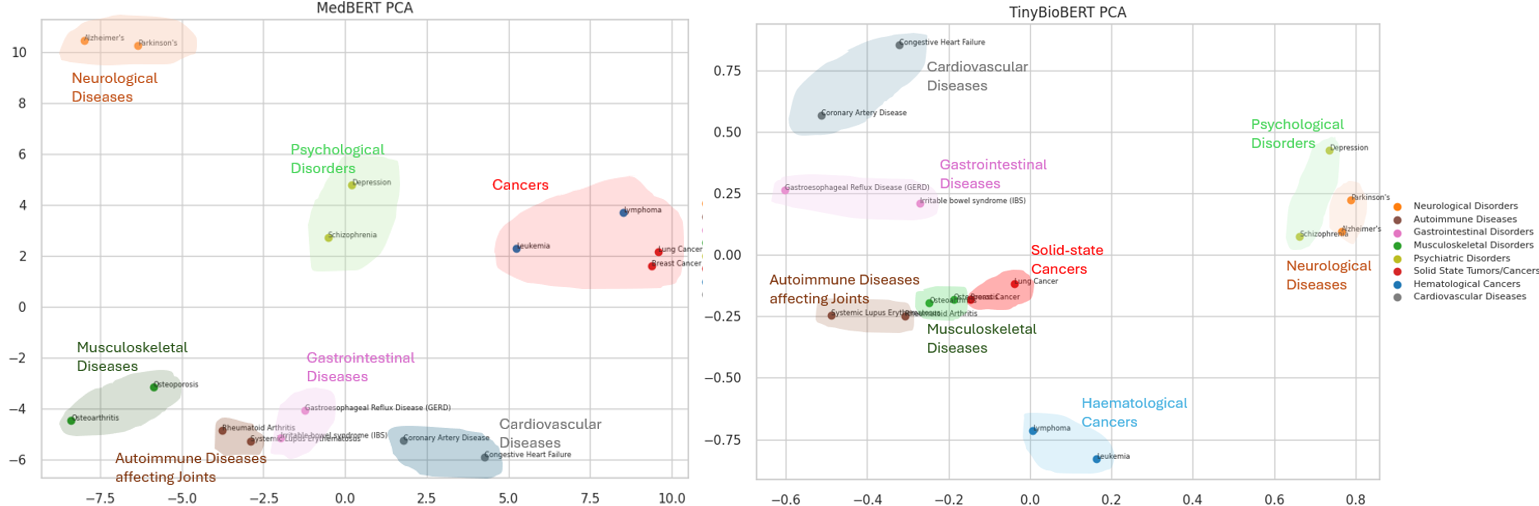

In [112]:
from IPython.display import Image, display
image_path = '/content/drive/MyDrive/Colab Notebooks/Clinical Trials Outcomes/Images/PCA_diseases.PNG'
display(Image(filename=image_path))

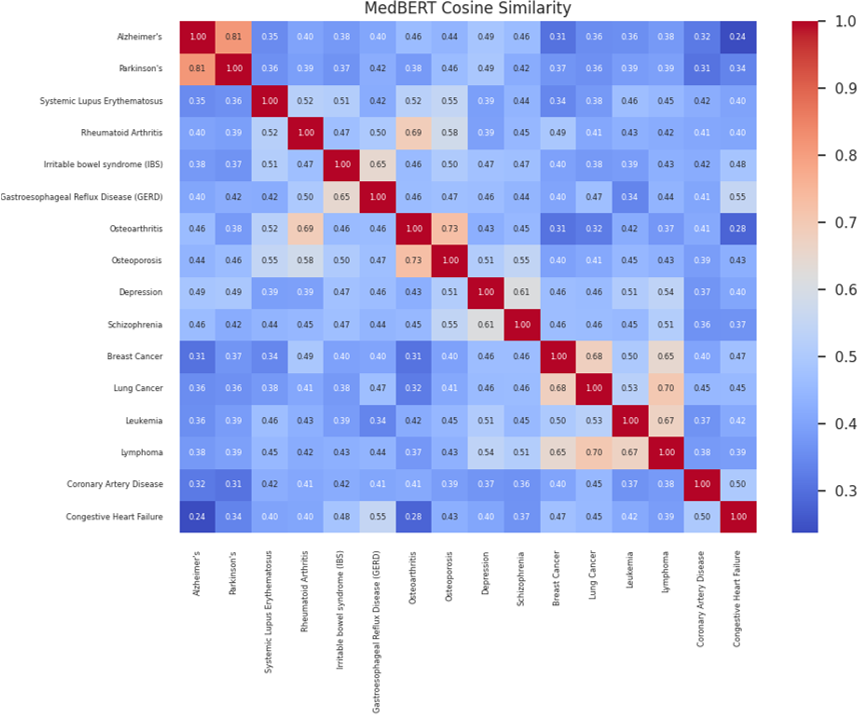

In [113]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Clinical Trials Outcomes/Images/Heatmap_MedBERT.PNG'
display(Image(filename=image_path))

MedBERT displays much better granularity in terms of cosine similarity scores across diseases from different categories, with values ranging from 0.2 to 0.81, while the others usually all land in the 0.8+ range. It's PCA graph also shows that it it capturing semantic information remarkably well, at least based on how we might group the diseases together from a physiological perspective. These two factors combine do make me want to prefer this model over the others to include in the downstream prediction model.

TinyBioBERT is also very interesting. While nearly not as granular as most other models, it's PCA analysis graph shows that it does remarkably well at clustering similar diseases together, even arguably surpassing BioBERT. That, and it's small size, also make it an interesting candidate for downstream inclusion.

Ultimately however, the performance when performing the downstream tasks is what matters most. While this experiment was interesting in understanding what semantic information is being captured by each model, I will not exclude too many models at this stage and will play around with the representations to include in the later stages of the project.

I will however probably not consider BERT and BlueBERT for downstream tasks.